## Data Acquisition Exercises

4. In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.

In [76]:
import env

import acquire

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from scipy import stats


np.random.seed(123)

In [77]:
from pydataset import data
df_iris = data('iris')


- print the first 3 rows

In [78]:
df_iris.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


- print the number of rows and columns (shape)


In [79]:
df_iris.shape

(150, 5)

- print the column names

In [80]:
df_iris.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

- print the data type of each column


In [81]:
df_iris.dtypes

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object

- print the summary statistics for each of the numeric variables. Would you recommend rescaling the data based on these statistics?


In [82]:
df_iris.agg(
    {
        "Sepal.Length": ["min", "max", "median", "mean", "skew"],
        "Sepal.Width": ["min", "max", "median", "mean", "skew"],
        "Petal.Length": ["min", "max", "median", "mean", "skew"],
        "Petal.Width": ["min", "max", "median", "mean", "skew"],
    }
)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
min,4.300000,2.000000,1.000000,0.100000
max,7.900000,4.400000,6.900000,2.500000
median,5.800000,3.000000,4.350000,1.300000
mean,5.843333,3.057333,3.758000,1.199333
skew,0.314911,0.318966,-0.274884,-0.102967


In [83]:
# or: 
stats = df_iris.describe().T
stats

,count,mean,std,min,25%,50%,75%,max
Sepal.Length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
Sepal.Width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
Petal.Length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
Petal.Width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


5. Read the Table1_CustDetails table from the Excel_Exercises.xlsx file into a dataframe named df_excel.

In [36]:
df_excel = pd.read_excel("Excel_Exercises.xlsx", sheet_name="Table1_CustDetails")
df_excel.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,Unnamed: 12,Unnamed: 13
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.6,593.30,No,NaN,NaN
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.9,542.40,No,NaN,NaN
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.9,280.85,Yes,NaN,NaN
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.0,1237.85,Yes,NaN,NaN
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.9,267.40,Yes,NaN,NaN


- assign the first 100 rows to a new dataframe, df_excel_sample


In [37]:
df_excel_sample = df_excel.head(100)
#df_excel_sample

- print the number of rows of your original dataframe

In [38]:
len(df_excel.index)

7049

In [39]:
# or:
df_excel.shape[0]

7049

- print the first 5 column names


In [40]:
df_excel.columns[0:5]

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents'], dtype='object')

- print the column names that have a data type of object

In [41]:
list(df_excel.select_dtypes(include=['object']).columns)

['customer_id', 'gender', 'partner', 'dependents', 'payment_type', 'churn']

In [42]:
# or:
df_excel.columns[df_excel.dtypes == object]

Index(['customer_id', 'gender', 'partner', 'dependents', 'payment_type',
       'churn'],
      dtype='object')

- compute the range for each of the numeric variables.


In [43]:
df_excel.dtypes

customer_id           object
gender                object
is_senior_citizen      int64
partner               object
dependents            object
phone_service          int64
internet_service       int64
contract_type          int64
payment_type          object
monthly_charges      float64
total_charges        float64
churn                 object
Unnamed: 12          float64
Unnamed: 13          float64
dtype: object

In [44]:
stats = df_excel.describe().T
stats

,count,mean,std,min,25%,50%,75%,max
is_senior_citizen,7049.0,0.162009,0.368485,0.00,0.0000,0.00,0.000,1.00
phone_service,7049.0,1.324585,0.642709,0.00,1.0000,1.00,2.000,2.00
internet_service,7049.0,1.222585,0.779068,0.00,1.0000,1.00,2.000,2.00
contract_type,7049.0,0.690878,0.833757,0.00,0.0000,0.00,1.000,2.00
monthly_charges,7049.0,64.747014,30.099460,18.25,35.4500,70.35,89.850,118.75
total_charges,7038.0,2283.043883,2266.521984,18.80,401.5875,1397.10,3793.775,8684.80
Unnamed: 12,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 13,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
stats['range'] = stats['max'] - stats['min']
stats[['range']]

,range
is_senior_citizen,1.0
phone_service,2.0
internet_service,2.0
contract_type,2.0
monthly_charges,100.5
total_charges,8666.0
Unnamed: 12,NaN
Unnamed: 13,NaN


6. Read the data from this google sheet into a dataframe, df_google

In [94]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1zw2b2UMnla_ZFTH_r8BsdhCnuUSi4gBdqKNX2I3X85M/edit#gid=341089357'

In [95]:
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')


In [96]:
df_google = pd.read_csv(csv_export_url)

- print the first 3 rows

In [97]:

df_google.head(3)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


- print the number of rows and columns


In [98]:
df_google.shape

(891, 12)

- print the column names

In [99]:
df_google.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

- print the data type of each column


In [100]:
df_google.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

- print the summary statistics for each of the numeric variables

In [101]:
stats2 = df_google.describe().T
stats2

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


- print the unique values for each of your categorical variables

In [102]:
for col in df_google:
    if df_google[col].dtypes == 'object':
        print(f'{col} has {df_google[col].nunique()} unique values.')

Name has 891 unique values.
Sex has 2 unique values.
Ticket has 681 unique values.
Cabin has 147 unique values.
Embarked has 3 unique values.


## Data Preparation Exercises

The end product of this exercise should be the specified functions in a python script named prepare.py. Do these in your classification_exercises.ipynb first, then transfer to the prepare.py file.

This work should all be saved in your local classification-exercises repo. Then add, commit, and push your changes.



### Using the Iris Data:


1.  Use the function defined in acquire.py to load the iris data.

In [103]:
import acquire
from sklearn.model_selection import train_test_split


In [104]:
iris_df = acquire.get_iris_data()
iris_df.head()

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2
3,1,setosa,4.6,3.1,1.5,0.2
4,1,setosa,5.0,3.6,1.4,0.2


In [105]:
iris_df.shape

(150, 6)

2. Drop the species_id and measurement_id columns.



In [106]:
cols_to_drop = ['species_id']
iris_df = iris_df.drop(columns=cols_to_drop)
iris_df.shape

(150, 5)

In [107]:
iris_df.head()

,species_name,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2


3. Rename the species_name column to just species.



In [108]:
iris_df = iris_df.rename(columns={'species_name' : 'species'})

In [109]:
iris_df.head()

,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2


4. Create dummy variables of the species name and concatenate onto the iris dataframe.



In [110]:
dummy_df = pd.get_dummies(iris_df[['species']], dummy_na=False)
dummy_df

,species_setosa,species_versicolor,species_virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,1,0,0


In [111]:
iris_df = pd.concat([iris_df, dummy_df], axis=1)
iris_df.head()


,species,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica
0,setosa,5.1,3.5,1.4,0.2,1,0,0
1,setosa,4.9,3.0,1.4,0.2,1,0,0
2,setosa,4.7,3.2,1.3,0.2,1,0,0
3,setosa,4.6,3.1,1.5,0.2,1,0,0
4,setosa,5.0,3.6,1.4,0.2,1,0,0


5. Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.



In [112]:
def prep_iris(iris_df):
    cols_to_drop = ['species_id']
    iris_df = iris_df.drop(columns=cols_to_drop)
    iris_df = iris_df.rename(columns={'species_name' : 'species'})
    dummy_df = pd.get_dummies(iris_df[['species']], dummy_na=False)
    iris_df = pd.concat([iris_df, dummy_df], axis=1)
    return iris_df

In [113]:
iris_df = acquire.get_iris_data()
iris_df.head()

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2
3,1,setosa,4.6,3.1,1.5,0.2
4,1,setosa,5.0,3.6,1.4,0.2


In [114]:
iris_df = prep_iris(iris_df)
iris_df.head()

,species,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica
0,setosa,5.1,3.5,1.4,0.2,1,0,0
1,setosa,4.9,3.0,1.4,0.2,1,0,0
2,setosa,4.7,3.2,1.3,0.2,1,0,0
3,setosa,4.6,3.1,1.5,0.2,1,0,0
4,setosa,5.0,3.6,1.4,0.2,1,0,0


Extra: split iris data

In [115]:
train, test = train_test_split(iris_df, test_size = .2, random_state=123, stratify=iris_df.species)




In [116]:
print(train.shape)
print(test.shape)

(120, 8)
(30, 8)


In [117]:
train, validate = train_test_split(train, test_size=.3, random_state=123, stratify=train.species)

In [118]:
print(f'Train: {train.shape}')
print(f'Validate: {validate.shape}')
print(f'Test: {test.shape}')


Train: (84, 8)
Validate: (36, 8)
Test: (30, 8)


### Using the Titanic dataset



1. Use the function defined in acquire.py to load the Titanic data.

In [119]:
titanic_df = acquire.get_titanic_data()
titanic_df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


2. Drop any unnecessary, unhelpful, or duplicated columns.



In [120]:
print(titanic_df.shape)
titanic_df = titanic_df.drop_duplicates()
print(titanic_df.shape)

(891, 13)
(891, 13)


In [121]:
cols_to_drop = ['deck', 'embarked', 'class', 'age']
titanic_df = titanic_df.drop(columns=cols_to_drop)
titanic_df.shape


(891, 9)

In [122]:
titanic_df.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone
0,0,0,3,male,1,0,7.2500,Southampton,0
1,1,1,1,female,1,0,71.2833,Cherbourg,0
2,2,1,3,female,0,0,7.9250,Southampton,1
3,3,1,1,female,1,0,53.1000,Southampton,0
4,4,0,3,male,0,0,8.0500,Southampton,1


3. Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.



In [123]:
dummy_df = pd.get_dummies(titanic_df[['sex', 'embark_town']], dummy_na=False, drop_first=[True, True])
dummy_df


,sex_male,embark_town_Queenstown,embark_town_Southampton
0,1,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,1,0,1
...,...,...,...
886,1,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [124]:
titanic_df = pd.concat([titanic_df, dummy_df], axis=1)
titanic_df.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,0,3,male,1,0,7.2500,Southampton,0,1,0,1
1,1,1,1,female,1,0,71.2833,Cherbourg,0,0,0,0
2,2,1,3,female,0,0,7.9250,Southampton,1,0,0,1
3,3,1,1,female,1,0,53.1000,Southampton,0,0,0,1
4,4,0,3,male,0,0,8.0500,Southampton,1,1,0,1


4. Create a function named prep_titanic that accepts the raw titanic data, and returns the data with the transformations above applied.



In [125]:
def prep_titanic(titanic_df):
    '''
    This function will clean the titanic data...
    '''
    titanic_df = titanic_df.drop_duplicates()
    cols_to_drop = ['deck', 'embarked', 'class', 'age']
    titanic_df = titanic_df.drop(columns=cols_to_drop)
    dummy_df = pd.get_dummies(titanic_df[['sex', 'embark_town']], dummy_na=False, drop_first=[True, True])
    titanic_df = pd.concat([titanic_df, dummy_df], axis=1)
    return titanic_df


In [126]:
titanic_df = acquire.get_titanic_data()
titanic_df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [127]:

titanic_df = prep_titanic(titanic_df)
titanic_df.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,0,3,male,1,0,7.2500,Southampton,0,1,0,1
1,1,1,1,female,1,0,71.2833,Cherbourg,0,0,0,0
2,2,1,3,female,0,0,7.9250,Southampton,1,0,0,1
3,3,1,1,female,1,0,53.1000,Southampton,0,0,0,1
4,4,0,3,male,0,0,8.0500,Southampton,1,1,0,1


Extra: Split titanic data

In [128]:
train, test = train_test_split(titanic_df, test_size = .2, random_state=123, stratify=titanic_df.survived)


In [129]:
print(train.shape)
print(test.shape)

(712, 12)
(179, 12)


In [130]:
train, validate = train_test_split(train, test_size=.3, random_state=123, stratify=train.survived)


In [131]:
print(f'Train: {train.shape}')
print(f'Validate: {validate.shape}')
print(f'Test: {test.shape}')


Train: (498, 12)
Validate: (214, 12)
Test: (179, 12)


In [132]:
def split_data(titanic_df):
    '''
    Takes in a dataframe and return train, validate, test subset dataframes
    '''
    train, test = train_test_split(titanic_df, test_size = .2, random_state=123, stratify=titanic_df.survived)
    train, validate = train_test_split(train, test_size=.3, random_state=123, stratify=train.survived)
    return train, validate, test


In [133]:
titanic_df.shape


(891, 12)

In [134]:
train, validate, test = split_data(titanic_df)
print(f'Train: {train.shape}')
print(f'Validate: {validate.shape}')
print(f'Test: {test.shape}')


Train: (498, 12)
Validate: (214, 12)
Test: (179, 12)


### Using the Telco dataset

1. Use the function defined in aquire.py to load the Telco data. 

In [135]:
telco_df = acquire.get_telco_data()
telco_df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,3,0016-QLJIS,Female,0,Yes,Yes,65,Yes,...,Yes,Yes,Yes,Yes,90.45,5957.9,No,Two year,DSL,Mailed check
1,4,1,3,0017-DINOC,Male,0,No,No,54,No,...,Yes,Yes,No,No,45.20,2460.55,No,Two year,DSL,Credit card (automatic)
2,3,1,3,0019-GFNTW,Female,0,No,No,56,No,...,Yes,No,No,No,45.05,2560.1,No,Two year,DSL,Bank transfer (automatic)
3,4,1,3,0056-EPFBG,Male,0,Yes,Yes,20,No,...,Yes,No,No,Yes,39.40,825.4,No,Two year,DSL,Credit card (automatic)
4,3,1,3,0078-XZMHT,Male,0,Yes,No,72,Yes,...,Yes,Yes,Yes,Yes,85.15,6316.2,No,Two year,DSL,Bank transfer (automatic)


2. Drop any unnecessary, unhelpful, or duplicated columns. This could mean dropping foreign key columns but keeping the corresponding string values, for example.

In [136]:
print(telco_df.shape)
telco_df = telco_df.drop_duplicates()
print(telco_df.shape)

(7043, 24)
(7043, 24)


In [137]:
for col in telco_df:
    print(col)
    print(telco_df[col].value_counts())

payment_type_id
1    2365
2    1612
3    1544
4    1522
Name: payment_type_id, dtype: int64
internet_service_type_id
2    3096
1    2421
3    1526
Name: internet_service_type_id, dtype: int64
contract_type_id
1    3875
3    1695
2    1473
Name: contract_type_id, dtype: int64
customer_id
7595-EHCDL    1
0093-EXYQL    1
4075-WKNIU    1
6527-PZFPV    1
7683-CBDKJ    1
             ..
8999-BOHSE    1
8039-ACLPL    1
0098-BOWSO    1
3803-KMQFW    1
4872-VXRIL    1
Name: customer_id, Length: 7043, dtype: int64
gender
Male      3555
Female    3488
Name: gender, dtype: int64
senior_citizen
0    5901
1    1142
Name: senior_citizen, dtype: int64
partner
No     3641
Yes    3402
Name: partner, dtype: int64
dependents
No     4933
Yes    2110
Name: dependents, dtype: int64
tenure
1     613
72    362
2     238
3     200
4     176
71    170
5     133
7     131
8     123
70    119
9     119
12    117
10    116
6     110
13    109
68    100
11     99
15     99
67     98
18     97
69     95
24     94
22 

In [138]:
cols_to_drop = ['payment_type_id', 'internet_service_type_id', 'contract_type_id']
telco_df = telco_df.drop(columns=cols_to_drop)
telco_df.shape


(7043, 21)

In [139]:

telco_df['total_charges'].value_counts()


           11
20.2       11
19.75       9
19.65       8
19.9        8
           ..
472.25      1
7795.95     1
54.3        1
811.65      1
3640.45     1
Name: total_charges, Length: 6531, dtype: int64

In [140]:
telco_df[telco_df.total_charges == ' ']


,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
85,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,Yes,Yes,...,Yes,Yes,No,No,56.05,,No,Two year,DSL,Credit card (automatic)
156,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,Yes,Yes,...,Yes,No,No,Yes,61.90,,No,Two year,DSL,Bank transfer (automatic)
236,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,No,Yes,...,Yes,Yes,No,No,73.35,,No,Two year,DSL,Mailed check
255,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,Yes,No,...,Yes,Yes,No,Yes,52.55,,No,Two year,DSL,Bank transfer (automatic)
339,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,Yes,Yes,...,No,Yes,Yes,No,80.85,,No,Two year,DSL,Mailed check
5681,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,No,20.00,,No,Two year,None,Mailed check
5717,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,No,20.25,,No,Two year,None,Mailed check
5727,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No internet service,No internet service,...,No internet service,No internet service,No internet service,No,25.35,,No,Two year,None,Mailed check
5798,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No internet service,No internet service,...,No internet service,No internet service,No internet service,No,25.75,,No,Two year,None,Mailed check
6007,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,No,19.85,,No,Two year,None,Mailed check


In [141]:
telco_df[telco_df.tenure == 0]

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
85,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,Yes,Yes,...,Yes,Yes,No,No,56.05,,No,Two year,DSL,Credit card (automatic)
156,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,Yes,Yes,...,Yes,No,No,Yes,61.90,,No,Two year,DSL,Bank transfer (automatic)
236,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,No,Yes,...,Yes,Yes,No,No,73.35,,No,Two year,DSL,Mailed check
255,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,Yes,No,...,Yes,Yes,No,Yes,52.55,,No,Two year,DSL,Bank transfer (automatic)
339,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,Yes,Yes,...,No,Yes,Yes,No,80.85,,No,Two year,DSL,Mailed check
5681,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,No,20.00,,No,Two year,None,Mailed check
5717,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,No,20.25,,No,Two year,None,Mailed check
5727,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No internet service,No internet service,...,No internet service,No internet service,No internet service,No,25.35,,No,Two year,None,Mailed check
5798,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No internet service,No internet service,...,No internet service,No internet service,No internet service,No,25.75,,No,Two year,None,Mailed check
6007,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,No,19.85,,No,Two year,None,Mailed check


In [142]:
telco_df['total_charges'] = telco_df['total_charges'].str.strip()


In [143]:

telco_df = telco_df[telco_df.total_charges != '']

In [144]:
telco_df[telco_df.tenure == 0]

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type


In [145]:
telco_df['total_charges'] = telco_df.total_charges.astype(float)

In [146]:
telco_df.describe()

,senior_citizen,tenure,monthly_charges,total_charges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [147]:
# Some more things we can do to help visualize/summarize the data:

In [148]:
# plot the numeric columns

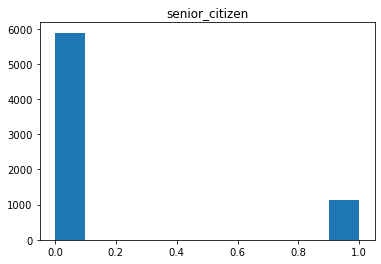

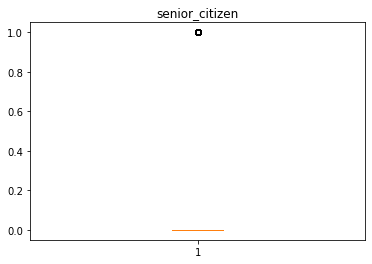

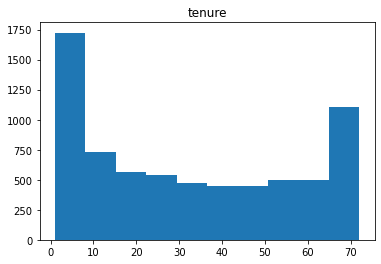

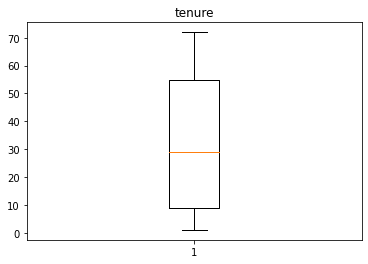

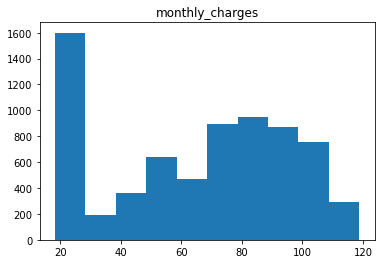

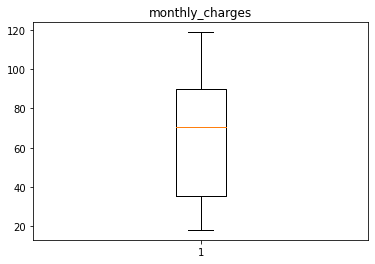

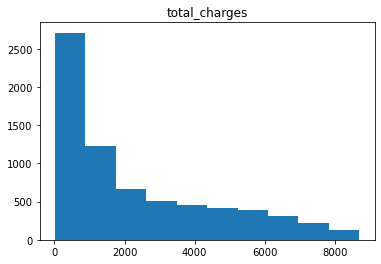

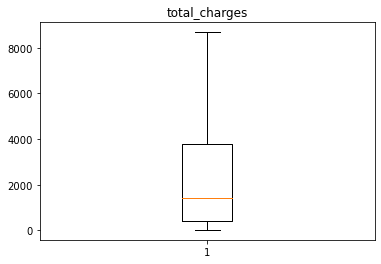

In [149]:
num_cols = telco_df.columns[[(telco_df[col].dtype == 'int64') or (telco_df[col].dtype == 'float64') for col in telco_df.columns]]
for col in num_cols:
    plt.hist(telco_df[col])
    plt.title(col)
    plt.show()
    plt.boxplot(telco_df[col])
    plt.title(col)
    plt.show()


In [150]:
# Use .describe with object columns
obj_cols = telco_df.columns[[telco_df[col].dtype == 'O' for col in telco_df.columns]]
obj_cols

Index(['customer_id', 'gender', 'partner', 'dependents', 'phone_service',
       'multiple_lines', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'paperless_billing', 'churn', 'contract_type', 'internet_service_type',
       'payment_type'],
      dtype='object')

In [151]:
for col in obj_cols:
    print(col.upper())
    print('Count:')
    print(telco_df[col].value_counts())
    print('\n')
    print('Proportions:')
    print(telco_df[col].value_counts(normalize=True, dropna=False))
    print('--------------------------')
    print('\n')

CUSTOMER_ID
Count:
7595-EHCDL    1
8910-LEDAG    1
4718-DHSMV    1
1527-SXDPN    1
4948-WBBKL    1
             ..
0098-BOWSO    1
3803-KMQFW    1
3675-EQOZA    1
1325-USMEC    1
7517-LDMPS    1
Name: customer_id, Length: 7032, dtype: int64


Proportions:
7595-EHCDL    0.000142
8910-LEDAG    0.000142
4718-DHSMV    0.000142
1527-SXDPN    0.000142
4948-WBBKL    0.000142
                ...   
0098-BOWSO    0.000142
3803-KMQFW    0.000142
3675-EQOZA    0.000142
1325-USMEC    0.000142
7517-LDMPS    0.000142
Name: customer_id, Length: 7032, dtype: float64
--------------------------


GENDER
Count:
Male      3549
Female    3483
Name: gender, dtype: int64


Proportions:
Male      0.504693
Female    0.495307
Name: gender, dtype: float64
--------------------------


PARTNER
Count:
No     3639
Yes    3393
Name: partner, dtype: int64


Proportions:
No     0.517491
Yes    0.482509
Name: partner, dtype: float64
--------------------------


DEPENDENTS
Count:
No     4933
Yes    2099
Name: dependents,

3. Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.



In [152]:
#dummy_df = pd.get_dummies(telco_df[['gender', 'contract_type', 'internet_service_type', 'payment_type']], dummy_na=False, drop_first=[True, True, True, True])
#dummy_df
#should encode all categorical variables not just the ones above

In [153]:
dummy_df = pd.get_dummies(telco_df[['multiple_lines', \
                              'online_security', \
                              'online_backup', \
                              'device_protection', \
                              'tech_support', \
                              'streaming_tv', \
                              'streaming_movies', \
                              'contract_type', \
                              'internet_service_type', \
                              'payment_type']], dummy_na=False)
dummy_df

,multiple_lines_No,multiple_lines_No phone service,multiple_lines_Yes,online_security_No,online_security_No internet service,online_security_Yes,online_backup_No,online_backup_No internet service,online_backup_Yes,device_protection_No,...,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0,0,1,0,0,1,0,0,1,0,...,0,0,1,1,0,0,0,0,0,1
1,0,1,0,0,0,1,1,0,0,1,...,0,0,1,1,0,0,0,1,0,0
2,0,1,0,0,0,1,0,0,1,0,...,0,0,1,1,0,0,1,0,0,0
3,0,1,0,0,0,1,1,0,0,0,...,0,0,1,1,0,0,0,1,0,0
4,0,0,1,1,0,0,0,0,1,0,...,0,0,1,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,0,0,1,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,1
7039,1,0,0,0,1,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,1
7040,1,0,0,0,1,0,0,1,0,0,...,1,0,0,0,0,1,0,1,0,0
7041,1,0,0,0,1,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,1


In [154]:
telco_df = pd.concat([telco_df, dummy_df], axis=1)
telco_df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0016-QLJIS,Female,0,Yes,Yes,65,Yes,Yes,Yes,Yes,...,0,0,1,1,0,0,0,0,0,1
1,0017-DINOC,Male,0,No,No,54,No,No phone service,Yes,No,...,0,0,1,1,0,0,0,1,0,0
2,0019-GFNTW,Female,0,No,No,56,No,No phone service,Yes,Yes,...,0,0,1,1,0,0,1,0,0,0
3,0056-EPFBG,Male,0,Yes,Yes,20,No,No phone service,Yes,No,...,0,0,1,1,0,0,0,1,0,0
4,0078-XZMHT,Male,0,Yes,No,72,Yes,Yes,No,Yes,...,0,0,1,1,0,0,1,0,0,0


4. Create a function named prep_telco that accepts the raw telco data, and returns the data with the transformations above applied.



In [155]:
#def prep_telco(telco_df):
   # '''
    #This function will clean the telco data...
    #'''
    #telco_df = telco_df.drop_duplicates()
    #cols_to_drop = ['payment_type_id', 'internet_service_type_id', 'contract_type_id']
    #telco_df = telco_df.drop(columns=cols_to_drop)
    #dummy_df = pd.get_dummies(telco_df[['gender', 'contract_type', 'internet_service_type', 'payment_type']], dummy_na=False, drop_first=[True, True, True, True])
    #telco_df = pd.concat([telco_df, dummy_df], axis=1)
    #return telco_df
    

In [156]:
#telco_df = acquire.get_telco_data()
#telco_df.head()

In [157]:
#telco_df = prep_telco(telco_df)
#telco_df.head()

Extra: Split the telco data

In [158]:
train, test = train_test_split(telco_df, test_size = .2, random_state=17, stratify=telco_df.churn)


In [159]:
print(train.shape)
print(test.shape)

(5625, 52)
(1407, 52)


In [160]:
train, validate = train_test_split(train, test_size=.3, random_state=17, stratify=train.churn)

In [161]:
print(f'Train: {train.shape}')
print(f'Validate: {validate.shape}')
print(f'Test: {test.shape}')


Train: (3937, 52)
Validate: (1688, 52)
Test: (1407, 52)


In [162]:
def split_data(telco_df):
    '''
    Takes in a dataframe and return train, validate, test subset dataframes
    '''
    train, test = train_test_split(telco_df, test_size = .2, random_state=17, stratify=telco_df.churn)
    train, validate = train_test_split(train, test_size=.3, random_state=17, stratify=train.churn)
    return train, validate, test


In [163]:
telco_df.shape

(7032, 52)

In [164]:
train, validate, test = split_data(telco_df)
print(f'Train: {train.shape}')
print(f'Validate: {validate.shape}')
print(f'Test: {test.shape}')

Train: (3937, 52)
Validate: (1688, 52)
Test: (1407, 52)


In [165]:
def prep_telco(telco_df):
    '''
    This function will clean the telco data...
    '''
    #Drop Duplicates
    telco_df = telco_df.drop_duplicates()
    
    # Drop null values stored as whitespace    
    telco_df['total_charges'] = telco_df['total_charges'].str.strip()
    telco_df = telco_df[telco_df.total_charges != '']
    
    # Convert to correct datatype
    telco_df['total_charges'] = telco_df.total_charges.astype(float)
    
    # Get dummies for non-binary categorical variables
    dummy_df = pd.get_dummies(telco_df[['multiple_lines', \
                              'online_security', \
                              'online_backup', \
                              'device_protection', \
                              'tech_support', \
                              'streaming_tv', \
                              'streaming_movies', \
                              'contract_type', \
                              'internet_service_type', \
                              'payment_type']], dummy_na=False)
    # Concatenate dummy dataframe to original 
    telco_df = pd.concat([telco_df, dummy_df], axis=1)
    
    # split the data
    train, validate, test = split_data(telco_df)
    return telco_df

In [166]:
telco_df = acquire.get_telco_data()
telco_df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,3,0016-QLJIS,Female,0,Yes,Yes,65,Yes,...,Yes,Yes,Yes,Yes,90.45,5957.9,No,Two year,DSL,Mailed check
1,4,1,3,0017-DINOC,Male,0,No,No,54,No,...,Yes,Yes,No,No,45.20,2460.55,No,Two year,DSL,Credit card (automatic)
2,3,1,3,0019-GFNTW,Female,0,No,No,56,No,...,Yes,No,No,No,45.05,2560.1,No,Two year,DSL,Bank transfer (automatic)
3,4,1,3,0056-EPFBG,Male,0,Yes,Yes,20,No,...,Yes,No,No,Yes,39.40,825.4,No,Two year,DSL,Credit card (automatic)
4,3,1,3,0078-XZMHT,Male,0,Yes,No,72,Yes,...,Yes,Yes,Yes,Yes,85.15,6316.2,No,Two year,DSL,Bank transfer (automatic)


In [167]:
telco_df = prep_telco(telco_df)
telco_df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,2,1,3,0016-QLJIS,Female,0,Yes,Yes,65,Yes,...,0,0,1,1,0,0,0,0,0,1
1,4,1,3,0017-DINOC,Male,0,No,No,54,No,...,0,0,1,1,0,0,0,1,0,0
2,3,1,3,0019-GFNTW,Female,0,No,No,56,No,...,0,0,1,1,0,0,1,0,0,0
3,4,1,3,0056-EPFBG,Male,0,Yes,Yes,20,No,...,0,0,1,1,0,0,0,1,0,0
4,3,1,3,0078-XZMHT,Male,0,Yes,No,72,Yes,...,0,0,1,1,0,0,1,0,0,0


## Exploratory Analysis

#### Section 1 - iris_db: Using iris data from our mySQL server and the methods used in the lesson above:



1. Acquire, prepare & split your data.

In [168]:
import acquire

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from scipy import stats


np.random.seed(123)

In [169]:
iris_df = acquire.get_iris_data()
iris_df.head()

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2
3,1,setosa,4.6,3.1,1.5,0.2
4,1,setosa,5.0,3.6,1.4,0.2


In [170]:
iris_df = prep_iris(iris_df)
iris_df.head()

,species,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica
0,setosa,5.1,3.5,1.4,0.2,1,0,0
1,setosa,4.9,3.0,1.4,0.2,1,0,0
2,setosa,4.7,3.2,1.3,0.2,1,0,0
3,setosa,4.6,3.1,1.5,0.2,1,0,0
4,setosa,5.0,3.6,1.4,0.2,1,0,0


In [171]:
train, test = train_test_split(iris_df, test_size = .2, random_state=123, stratify=iris_df.species)

In [172]:
train, validate = train_test_split(train, test_size=.3, random_state=123, stratify=train.species)

In [173]:
print(f'Train: {train.shape}')
print(f'Validate: {validate.shape}')
print(f'Test: {test.shape}')

Train: (84, 8)
Validate: (36, 8)
Test: (30, 8)


2. Univariate Stats

- For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

In [174]:
train.dtypes

species                object
sepal_length          float64
sepal_width           float64
petal_length          float64
petal_width           float64
species_setosa          uint8
species_versicolor      uint8
species_virginica       uint8
dtype: object

In [175]:
# assign quantitative variables to quan_vars

In [176]:
quan_vars = train[['sepal_length','sepal_width','petal_length','petal_width']]

In [177]:
quan_vars.head()

,sepal_length,sepal_width,petal_length,petal_width
79,5.7,2.6,3.5,1.0
36,5.5,3.5,1.3,0.2
133,6.3,2.8,5.1,1.5
95,5.7,3.0,4.2,1.2
18,5.7,3.8,1.7,0.3


In [178]:
# assign categorical variables to cat_vars

In [179]:
cat_vars = train[['species_setosa', 'species_versicolor', 'species_virginica']]

In [180]:
cat_vars.head()

,species_setosa,species_versicolor,species_virginica
79,0,1,0
36,1,0,0
133,0,0,1
95,0,1,0
18,1,0,0


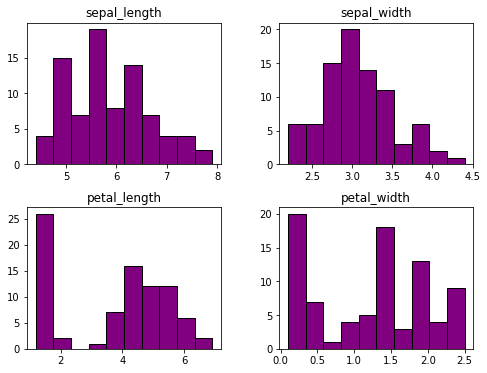

In [181]:
quan_vars.hist(figsize=(8,6), color='purple', edgecolor='black', grid=False);

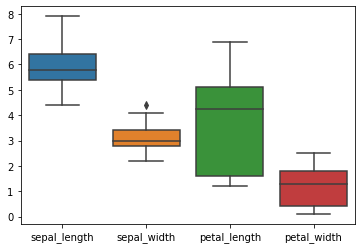

In [182]:
sns.boxplot(data=quan_vars);

In [183]:
# compute descriptive statistics (using .describe()

In [184]:
stats = train.describe().T
stats


,count,mean,std,min,25%,50%,75%,max
sepal_length,84.0,5.870238,0.769099,4.4,5.375,5.80,6.4,7.9
sepal_width,84.0,3.075000,0.448256,2.2,2.800,3.00,3.4,4.4
petal_length,84.0,3.771429,1.734940,1.2,1.600,4.25,5.1,6.9
petal_width,84.0,1.203571,0.752577,0.1,0.400,1.30,1.8,2.5
species_setosa,84.0,0.333333,0.474236,0.0,0.000,0.00,1.0,1.0
species_versicolor,84.0,0.333333,0.474236,0.0,0.000,0.00,1.0,1.0
species_virginica,84.0,0.333333,0.474236,0.0,0.000,0.00,1.0,1.0


In [185]:
stats['range'] = stats['max'] - stats['min']
stats[['mean', '50%', 'std', 'range']]


,mean,50%,std,range
sepal_length,5.870238,5.80,0.769099,3.5
sepal_width,3.075000,3.00,0.448256,2.2
petal_length,3.771429,4.25,1.734940,5.7
petal_width,1.203571,1.30,0.752577,2.4
species_setosa,0.333333,0.00,0.474236,1.0
species_versicolor,0.333333,0.00,0.474236,1.0
species_virginica,0.333333,0.00,0.474236,1.0


- For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

In [186]:
# frequency table:
train.species.value_counts()


virginica     28
versicolor    28
setosa        28
Name: species, dtype: int64

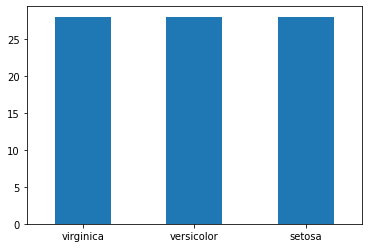

In [187]:
train.species.value_counts().plot.bar(rot=0);

- Document takeaways & any actions.

In [188]:
# the frequency for each species is the same

3. Bivariate Stats



- Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

Text(0.5, 0, '')

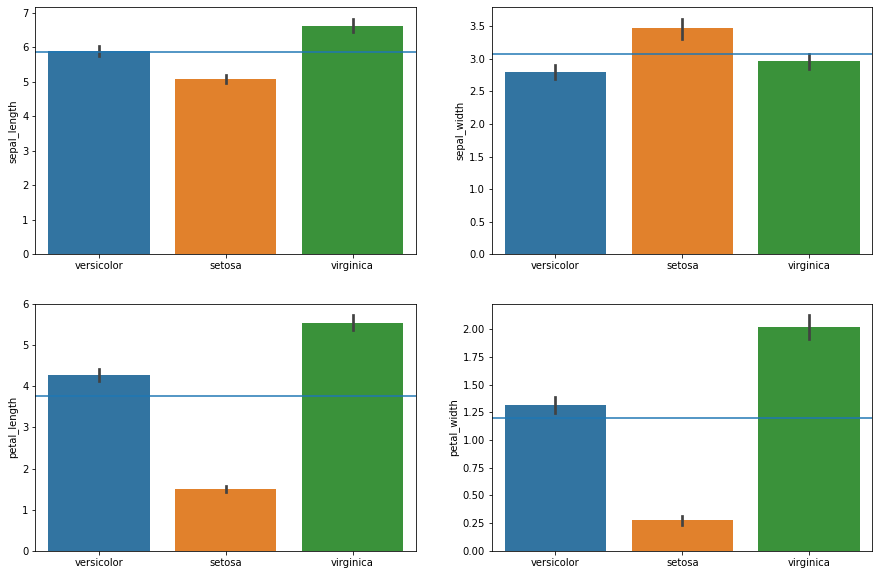

In [189]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
label = ["setosa","versicolor","virginica"]


sns.barplot(x="species", y="sepal_length", data=train, ax=ax1)
species_sepal_length = train.sepal_length.mean()
ax1.axhline(species_sepal_length)
ax1.set_xlabel("")

sns.barplot(x="species", y="sepal_width", data=train, ax=ax2)
species_sepal_width = train.sepal_width.mean()
ax2.axhline(species_sepal_width)
ax2.set_xlabel("")

sns.barplot(x="species", y="petal_length", data=train, ax=ax3)
species_petal_length = train.petal_length.mean()
ax3.axhline(species_petal_length)
ax3.set_xlabel("")

sns.barplot(x="species", y="petal_width", data=train, ax=ax4)
species_petal_width = train.petal_width.mean()
ax4.axhline(species_petal_width)
ax4.set_xlabel("")

- For each measurement type, compute the descriptive statistics for each species.

In [190]:
quan_stats = quan_vars.describe().T
quan_stats

,count,mean,std,min,25%,50%,75%,max
sepal_length,84.0,5.870238,0.769099,4.4,5.375,5.80,6.4,7.9
sepal_width,84.0,3.075000,0.448256,2.2,2.800,3.00,3.4,4.4
petal_length,84.0,3.771429,1.734940,1.2,1.600,4.25,5.1,6.9
petal_width,84.0,1.203571,0.752577,0.1,0.400,1.30,1.8,2.5


- For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

In [196]:
from scipy.stats import mannwhitneyu

In [191]:
virginica_petal_width = train["petal_width"][train["species_virginica"] == 1]
versicolor_petal_width = train["petal_width"][train["species_versicolor"] == 1]

virginica_petal_length= train["petal_length"][train["species_virginica"] == 1]
versicolor_petal_length = train["petal_length"][train["species_versicolor"] == 1]

virginica_sepal_width = train["sepal_width"][train["species_virginica"] == 1]
versicolor_sepal_width = train["sepal_width"][train["species_versicolor"] == 1]

virginica_sepal_length = train["sepal_length"][train["species_virginica"] == 1]
versicolor_sepal_length = train["sepal_length"][train["species_versicolor"] == 1]


In [192]:
# petal width

In [198]:
t, p = mannwhitneyu(virginica_petal_width, versicolor_petal_width, alternative="greater")


In [199]:
alpha = .05

In [200]:
null_hypothesis = "Virginica has a petal width less than or equal to Versicolor."
alternative_hypothesis = "Virginica has a greater petal width tham Versicolor"


In [201]:
t, p

(767.0, 3.235595834904965e-10)

In [202]:
if p < alpha:
    print("We find evidence to reject the null hypothesis that", null_hypothesis)
    print("We find evidence evidence to move forward with the understaind that", alternative_hypothesis)
else:
    print("We fail to reject the null hypothesis")
    print("There is no evidence that", null_hypothesis)


We find evidence to reject the null hypothesis that Virginica has a petal width less than or equal to Versicolor.
We find evidence evidence to move forward with the understaind that Virginica has a greater petal width tham Versicolor


In [626]:
# petal length

In [203]:
t, p = mannwhitneyu(virginica_petal_length, versicolor_petal_length, alternative="greater")


In [204]:
null_hypothesis = "Virginica has a petal length less than or equal to Versicolor."
alternative_hypothesis = "Virginica has a greater petal length tham Versicolor"


In [205]:
t, p

(776.5, 1.4739917857575313e-10)

In [206]:
if p < alpha:
    print("We find evidence to reject the null hypothesis that", null_hypothesis)
    print("We find evidence evidence to move forward with the understaind that", alternative_hypothesis)
else:
    print("We fail to reject the null hypothesis")
    print("There is no evidence that", null_hypothesis)

We find evidence to reject the null hypothesis that Virginica has a petal length less than or equal to Versicolor.
We find evidence evidence to move forward with the understaind that Virginica has a greater petal length tham Versicolor


In [631]:
# sepal width

In [207]:
t, p = mannwhitneyu(virginica_sepal_width, versicolor_sepal_width, alternative="greater")


In [208]:
null_hypothesis = "Virginica has a sepal width less than or equal to Versicolor."
alternative_hypothesis = "Virginica has a greater sepal width tham Versicolor"


In [209]:
t, p

(510.0, 0.026286295699228482)

In [210]:
if p < alpha:
    print("We find evidence to reject the null hypothesis that", null_hypothesis)
    print("We find evidence evidence to move forward with the understaind that", alternative_hypothesis)
else:
    print("We fail to reject the null hypothesis")
    print("There is no evidence that", null_hypothesis)

We find evidence to reject the null hypothesis that Virginica has a sepal width less than or equal to Versicolor.
We find evidence evidence to move forward with the understaind that Virginica has a greater sepal width tham Versicolor


In [636]:
# sepal length

In [211]:
t, p = mannwhitneyu(virginica_sepal_length, versicolor_sepal_length, alternative="greater")


In [212]:
null_hypothesis = "Virginica has a sepal length less than or equal to Versicolor."
alternative_hypothesis = "Virginica has a greater sepal length tham Versicolor"


In [213]:
t, p

(676.5, 1.541014598267054e-06)

In [214]:
if p < alpha:
    print("We find evidence to reject the null hypothesis that", null_hypothesis)
    print("We find evidence evidence to move forward with the understaind that", alternative_hypothesis)
else:
    print("We fail to reject the null hypothesis")
    print("There is no evidence that", null_hypothesis)

We find evidence to reject the null hypothesis that Virginica has a sepal length less than or equal to Versicolor.
We find evidence evidence to move forward with the understaind that Virginica has a greater sepal length tham Versicolor


- Document takeaways & any actions.



Virginica appears to have greater measurements than Versicolor.

<AxesSubplot:>

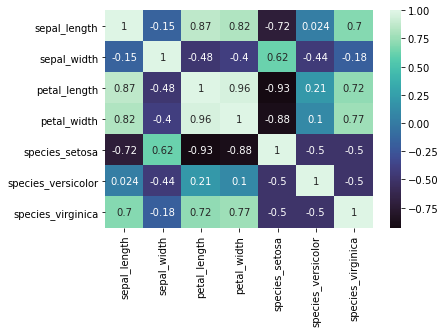

In [215]:
sns.heatmap(train.corr(),cmap='mako', center=0, annot=True)

4. Multivariate Stats

- Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

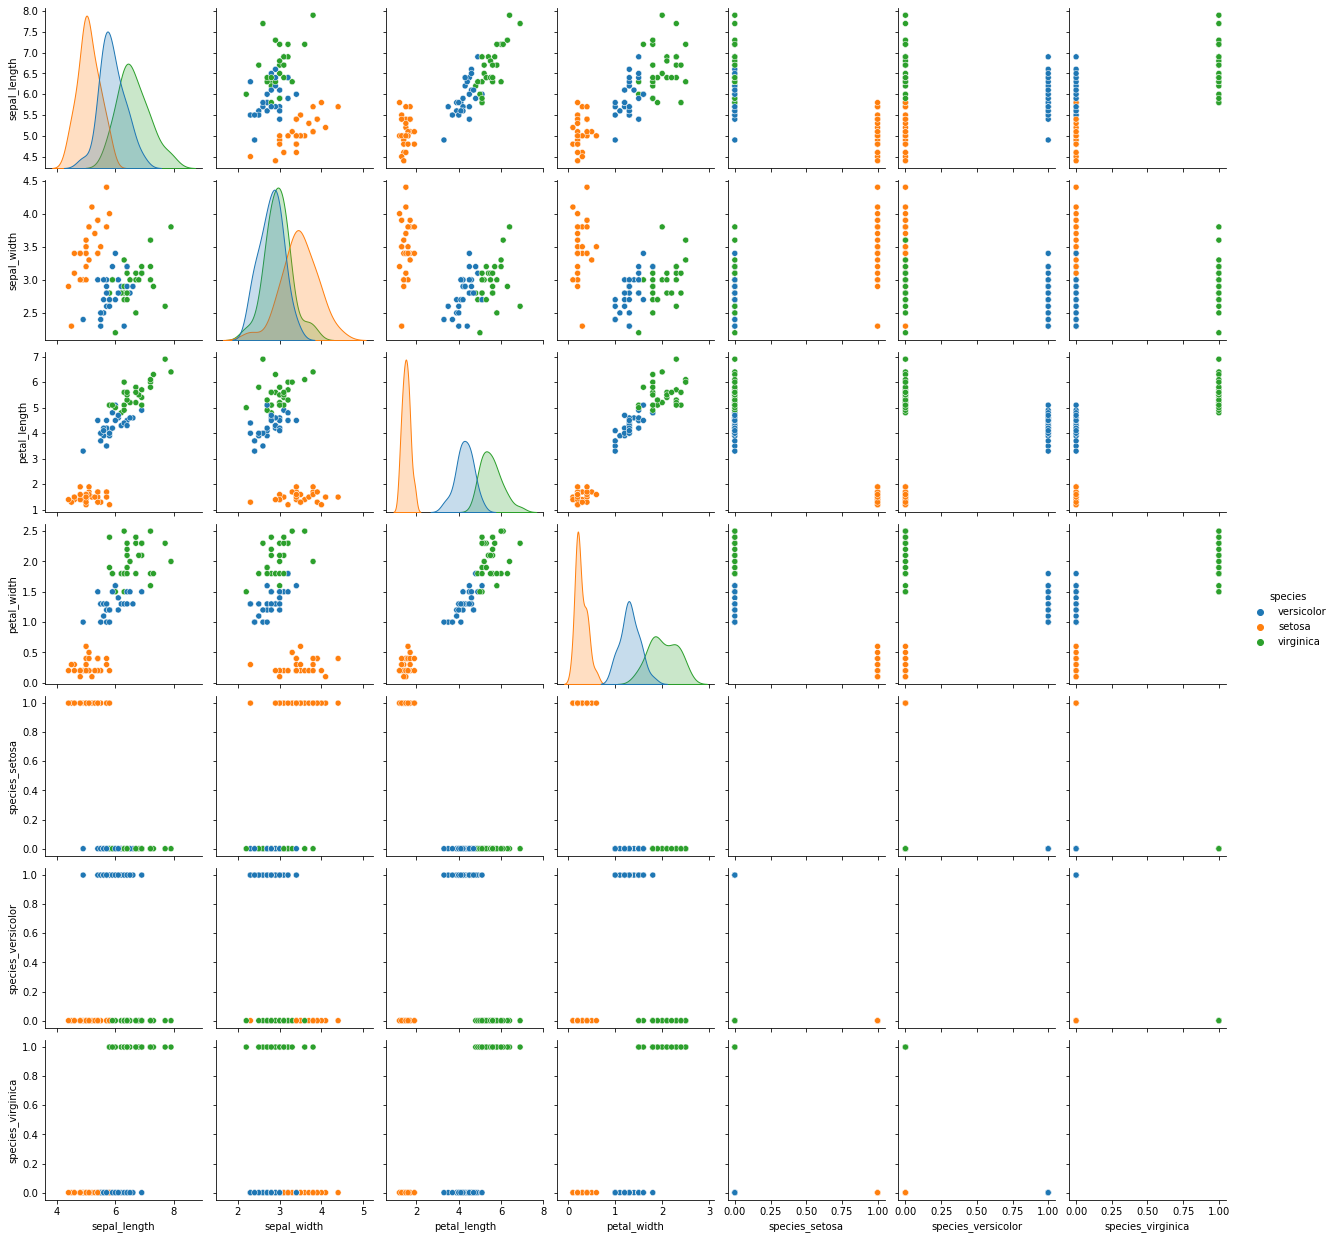

In [216]:
sns.pairplot(train, hue='species')
plt.show()

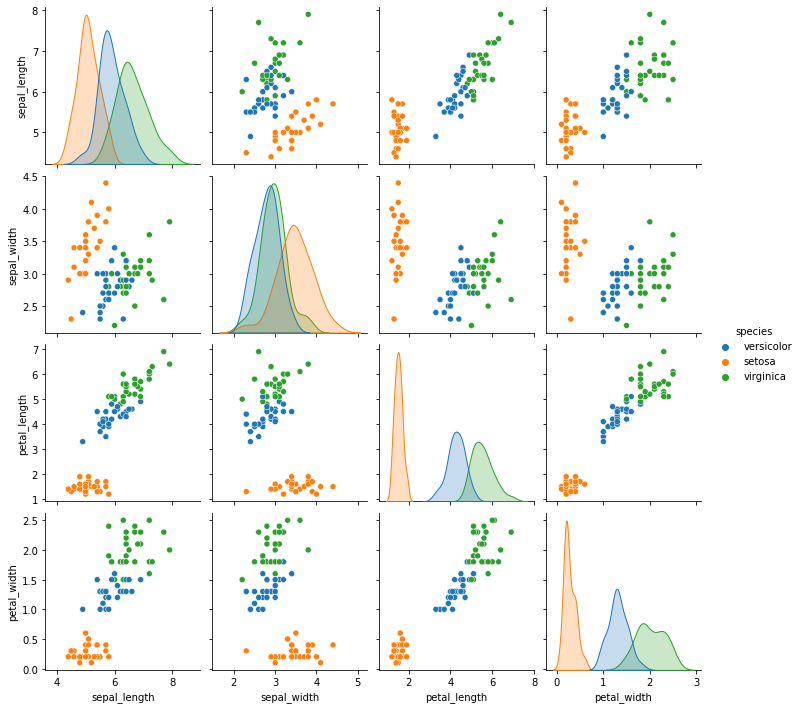

In [217]:
sns.pairplot(train, vars = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], hue= 'species');

- Visualize two numeric variables by means of the species. Hint: sns.relplot with hue or col



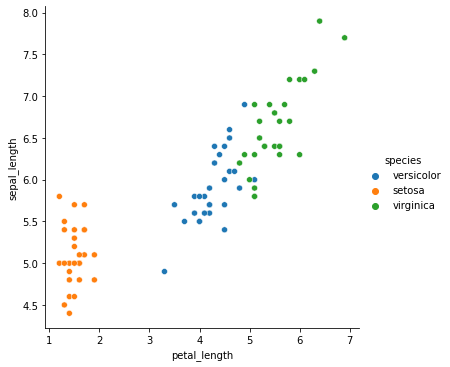

In [218]:
sns.relplot(x='petal_length', y='sepal_length', hue='species', data= train);


- Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

In [219]:
irs_melted = pd.melt(iris, id_vars=["species"], value_vars=["sepal_length","sepal_width", "petal_length", "petal_width"])
plt.figure(figsize=(20,15))
sns.swarmplot(x="variable", y="value", hue="species", data=irs_melted, size=10);

NameError: name 'iris' is not defined

In [ ]:
iris_melted = train.melt(id_vars=['species'], value_vars=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

In [ ]:
iris_melted.info()

In [ ]:
plt.figure(figsize=(10,7))
sns.swarmplot(data=iris_melted, x='variable', y='value', hue='species');

- Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

In [ ]:
null_hypothesis = "Versicolor has a petal area less than or equal to Setosa."
alternative_hypothesis = "Versicolor has a greater prtal area than Setosa"


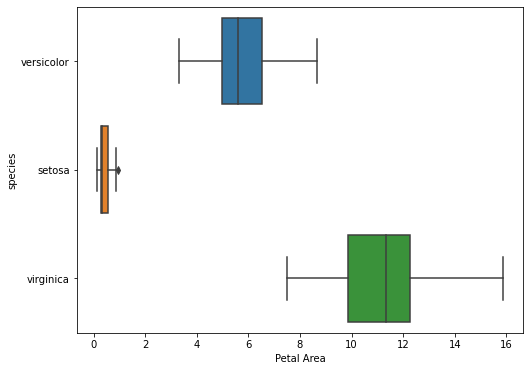

In [220]:
plt.figure(figsize=(8,6))
sns.boxplot(data=train, y='species', x=(train.petal_width * train.petal_length))
plt.xlabel('Petal Area');

In [221]:
train['petal_area'] = train['petal_length'] * train['petal_width']

In [222]:
versicolor_petal_area = train['petal_area'][train['species'] == 'species_versicolor']
setosa_petal_area = train['petal_area'][train['species'] == 'species_setosa']

In [223]:
t, p = mannwhitneyu(versicolor_petal_area, setosa_petal_area, alternative="greater")

In [224]:
t, p

(0.0, 1.0)

In [225]:
alpha = 0.05

In [226]:
if p < alpha:
    print("We find evidence to reject the null hypothesis that", null_hypothesis)
    print("We find evidence evidence to move forward with the understaind that", alternative_hypothesis)
else:
    print("We fail to reject the null hypothesis")
    print("There is no evidence that", null_hypothesis)

We fail to reject the null hypothesis
There is no evidence that Virginica has a sepal length less than or equal to Versicolor.


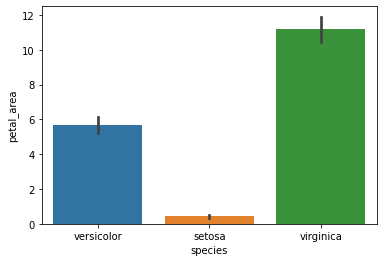

In [227]:
sns.barplot(x="species", y="petal_area", data=train);

- Document takeaways and any actions.

Versicolor petal area is greater than Setosa.

#### Exercises Part II

Explore your titanic dataset more completely.

In [13]:
import env

import acquire

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from scipy import stats


np.random.seed(123)

In [14]:
titanic_df = acquire.get_titanic_data()
titanic_df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [15]:
train, test = train_test_split(titanic_df, test_size = .2, random_state=123, stratify=titanic_df.survived)


In [16]:
train, validate = train_test_split(train, test_size=.3, random_state=123, stratify=train.survived)


In [17]:
def split_data(titanic_df):
    '''
    Takes in a dataframe and return train, validate, test subset dataframes
    '''
    train, test = train_test_split(titanic_df, test_size = .2, random_state=123, stratify=titanic_df.survived)
    train, validate = train_test_split(train, test_size=.3, random_state=123, stratify=train.survived)
    return train, validate, test

In [18]:
def prep_titanic(titanic_df):
    '''
    This function will clean the titanic data...
    '''
    titanic_df = titanic_df.drop_duplicates()
    cols_to_drop = ['deck', 'embarked', 'class', 'age']
    titanic_df = titanic_df.drop(columns=cols_to_drop)
    dummy_df = pd.get_dummies(titanic_df[['sex', 'embark_town']], dummy_na=False, drop_first=[True, True])
    titanic_df = pd.concat([titanic_df, dummy_df], axis=1)
    
    # split the data
    train, validate, test = split_data(titanic_df)
    return titanic_df

In [19]:
titanic_df = prep_titanic(titanic_df)
titanic_df.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,0,3,male,1,0,7.2500,Southampton,0,1,0,1
1,1,1,1,female,1,0,71.2833,Cherbourg,0,0,0,0
2,2,1,3,female,0,0,7.9250,Southampton,1,0,0,1
3,3,1,1,female,1,0,53.1000,Southampton,0,0,0,1
4,4,0,3,male,0,0,8.0500,Southampton,1,1,0,1


In [21]:
train.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
583,583,0,1,male,36.0,0,0,40.1250,C,First,A,Cherbourg,1
165,165,1,3,male,9.0,0,2,20.5250,S,Third,NaN,Southampton,0
50,50,0,3,male,7.0,4,1,39.6875,S,Third,NaN,Southampton,0
259,259,1,2,female,50.0,0,1,26.0000,S,Second,NaN,Southampton,0
306,306,1,1,female,NaN,0,0,110.8833,C,First,NaN,Cherbourg,1


- Determine drivers of the target variable


Answer: Two possible drivers are sex and class

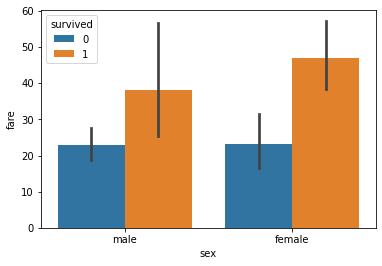

In [32]:
# check sex for the driver
sns.barplot(x='sex', y='fare', data=train, hue='survived');


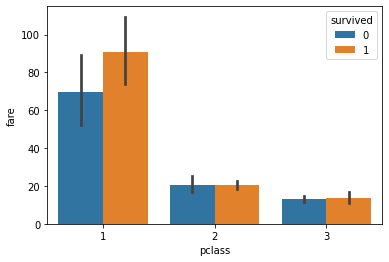

In [33]:
# check pclass for the driver
sns.barplot(x='pclass', y='fare', data=train, hue='survived');

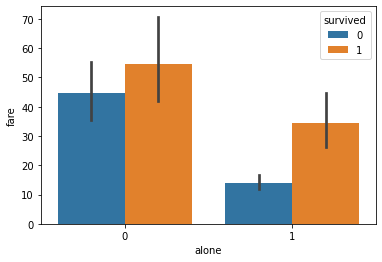

In [35]:
# check alone for the driver
sns.barplot(x='alone', y='fare', data=train, hue='survived');

- Determine if certain columns should be dropped

Answer: Could drop passenger_id and maybe some others, but I don't want to resplit the data. 

- Determine if it would be valuable to bin some numeric columns


Answer: No value in binning fare or age.

- Determine if it would be valuable to combine multiple columns into one.

Answer: None to combine.

- Does it make sense to combine any features?



Answer: No

- Do you find any surprises?



Answer: No 

- Document any and all findings and takeaways in your notebook using markdown.



Answer: Fare and sex are two big drivers of survivability. 

#### Exercises Part III

- Explore your telco data to discover drivers of churn

- Determine if certain columns should be dropped


- Determine if it would be valuable to bin some numeric columns

- Determine if it would be valuable to combine multiple columns into one.


What are your drivers of churn?



Does it make sense to combine any features?



Do you find any surprises?

Document any and all findings and takeaways in your notebook using markdown.